In [2]:
import torch
from lenstronomy.LensModel.lens_model import LensModel
#from caustic_test.caustic.test.utils import lens_test_helper

from caustic.cosmology import FlatLambdaCDMCosmology
from caustic.lenses import NFW

#next to imports to get Rs_angle and alpha_Rs in arcsec for lenstronomy
from lenstronomy.Cosmo.lens_cosmo import LensCosmo
from astropy.cosmology import FlatLambdaCDM

from astropy.cosmology import default_cosmology
from scipy.special import hyp2f1

from lenstronomy.Cosmo.nfw_param import NFWParam

import numpy as np

import matplotlib.pyplot as plt

In [3]:
h0_default = float(default_cosmology.get().h)
rho_cr_0_default = float(
    default_cosmology.get().critical_density(0).to("solMass/Mpc^3").value
)
Om0_default = float(default_cosmology.get().Om0)
Ob0_default = float(default_cosmology.get().Ob0)

In [4]:
cosmology = FlatLambdaCDMCosmology()

cosmo = FlatLambdaCDM(H0=h0_default*100., Om0=Om0_default, Ob0=Ob0_default)
lenstr = NFWParam(cosmo=cosmo)
rho_c_lenstronomy = lenstr.rho0_c(15., 0.001) #* 0.6766**(-2.)

In [19]:
#This should return 15!!!!!
lenstr.c_rho0(rho_c_lenstronomy, 0.001)

array(17.1870004)

In [7]:
lens=NFW()
Rhos_cau = lens.get_rho_s(0.001, cosmology, torch.tensor(15.))
print(rho_c_lenstronomy/Rhos_cau)

tensor(2.1844)


In [8]:
lenstr.rhoc_z(0.01)/cosmology.rho_cr(0.01)

2.1844193387741693

In [14]:
1/h0_default**2

2.1844193407090398

In [9]:
x = np.arange(0.01,1.5,0.02)
x_cau = torch.tensor(x)

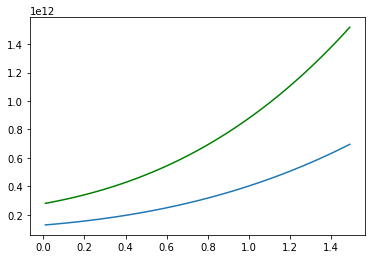

In [10]:
plt.plot(x, lenstr.rhoc_z(x), 'g')
plt.plot(x, cosmology.rho_cr(x_cau).numpy())
plt.show()